In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('Social Media Engagement Dataset.csv', encoding="Latin1")
print(f"Dataset cargado: {df.shape}")

Dataset cargado: (12000, 28)


In [3]:
# crear una copia
df_copia = df.copy()

# eliminar columnas innecesarias
df_copia = df_copia.drop(columns=["post_id"])
df_copia = df_copia.drop(columns=["buzz_change_rate"])
df_copia = df_copia.drop(columns=["user_past_sentiment_avg"])
df_copia = df_copia.drop(columns=["user_engagement_growth"])
df_copia = df_copia.drop(columns=["toxicity_score"])
df_copia = df_copia.drop(columns=["sentiment_score"])

# renombrar columnas al español
df_copia = df_copia.rename(columns={
    "likes_count": "likes",
    "text_content": "contenido",
    "platform": "plataforma",
    "user_id": "id_usuario",
    "day_of_week": "dia_semana",
    "mentions": "menciones",
    "keywords": "palabras_clave",
    "impressions": "visualizaciones",
    "engagement_rate": "tasa_compromiso",
    "brand_name": "nombre_marca",
    "product_name": "nombre_producto",
    "campaign_name": "nombre_campaña",
    "campaign_phase": "fase_campaña",
    "location": "ubicacion",
    "comments_count": "numero_comentarios",
    "language": "idioma",
    "shares_count": "numero_compartidos",
    "emotion_type": "emocion",
    "topic_category": "categoria_tema",
    "sentiment_score": "puntaje_sentimiento",
    "sentiment_label": "etiqueta_sentimiento"
})
df_copia.head()


,timestamp,dia_semana,plataforma,id_usuario,ubicacion,idioma,contenido,hashtags,menciones,palabras_clave,...,emocion,likes,numero_compartidos,numero_comentarios,visualizaciones,tasa_compromiso,nombre_marca,nombre_producto,nombre_campaña,fase_campaña
0,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,"price, unique, traditional, efficient",...,Confused,1264,1704,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch
1,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO","delivery, slow",...,Angry,522,1803,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch
2,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,"reliable, budget, durable, experience",...,Confused,2689,705,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch
3,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport","improved, competitive, luxury, fast",...,Sad,1827,262,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch
4,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName","innovation, budget, helpful, luxury",...,Happy,2005,1443,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch


In [4]:
# convertir la columna de fecha a tipo datetime y extraer componentes
df_copia["timestamp"] = pd.to_datetime(df_copia["timestamp"])
df_copia["Año"] = df_copia["timestamp"].dt.year
df_copia["Mes"] = df_copia["timestamp"].dt.month
df_copia["Dia"] = df_copia["timestamp"].dt.day
df_copia["Hora"] = df_copia["timestamp"].dt.time
df_copia["Nombre Mes"] = df_copia["timestamp"].dt.month_name()

df_copia.describe()

,timestamp,likes,numero_compartidos,numero_comentarios,visualizaciones,tasa_compromiso,Año,Mes,Dia
count,12000,12000.00000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000
mean,2024-10-30 09:11:56.604916736,2490.72025,1007.167167,504.34575,49811.338500,0.278137,2024.325750,6.55675,15.769250
min,2024-05-01 01:04:04,0.00000,0.000000,0.00000,130.000000,0.001880,2024.000000,1.00000,1.000000
25%,2024-07-31 17:31:49.500000,1236.00000,510.000000,253.00000,24716.500000,0.049100,2024.000000,4.00000,8.000000
50%,2024-10-31 03:49:36.500000,2496.00000,1018.000000,503.00000,49674.000000,0.080605,2024.000000,7.00000,16.000000
75%,2025-01-28 13:32:56.750000128,3723.25000,1501.000000,755.00000,74815.000000,0.163123,2025.000000,10.00000,23.000000
max,2025-04-30 23:46:43,5000.00000,2000.000000,1000.00000,99997.000000,32.211710,2025.000000,12.00000,31.000000
std,NaN,1441.53253,575.072282,288.68416,28930.289451,1.149206,0.468674,3.45588,8.827363


In [ ]:
# extraer el país de la columna de ubicación
df_copia["pais"] = df_copia["ubicacion"].str.split(",").str[-1].str.strip()

# mapear países a continentes
country_to_continent = {
    "Spain": "Europe",
    "France": "Europe",
    "Germany": "Europe",
    "Italy": "Europe",
    "UK": "Europe",
    "Canada": "North America",
    "Mexico": "North America",
    "USA": "North America",
    "Brazil": "South America",
    "Japan": "Asia",
    "India": "Asia",
    "China": "Asia",
    "Singapore": "Asia",
    "UAE": "Asia",
    "South Korea": "Asia",
    "Australia": "Oceania",
    "South Africa": "Africa",
    "Nigeria": "Africa",
    "Egypt": "Africa"
}

# agregar columna de continente
df_copia["continente"] = df_copia["pais"].map(country_to_continent)

# contar valores por continente
df_copia["continente"].value_counts()



['timestamp',
 'dia_semana',
 'plataforma',
 'id_usuario',
 'ubicacion',
 'idioma',
 'contenido',
 'hashtags',
 'menciones',
 'palabras_clave',
 'categoria_tema',
 'etiqueta_sentimiento',
 'emocion',
 'likes',
 'numero_compartidos',
 'numero_comentarios',
 'visualizaciones',
 'tasa_compromiso',
 'nombre_marca',
 'nombre_producto',
 'nombre_campaña',
 'fase_campaña',
 'Año',
 'Mes',
 'Dia',
 'Hora',
 'Nombre Mes',
 'pais',
 'continente']

## Distribución de interacciones totales

- Ver si hay outliers
- Ver si la mayoría de posts tienen poco engagement
- Detectar sesgo

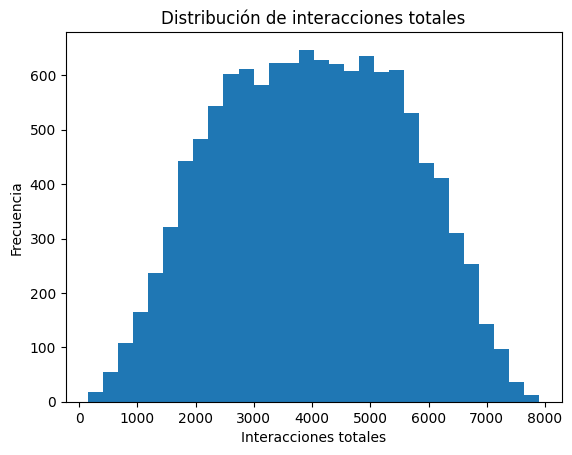

In [19]:
df_copia["interacciones_totales"] = (
    df_copia["likes"]
    + df_copia["numero_comentarios"]
    + df_copia["numero_compartidos"]
)

plt.figure()
plt.hist(df_copia["interacciones_totales"], bins=30)
plt.xlabel("Interacciones totales")
plt.ylabel("Frecuencia")
plt.title("Distribución de interacciones totales")
plt.show()


## Interacciones por plataforma

- Comparar plataformas de forma justa
- Ver cuál genera más engagement
- Detectar dispersión

## Interacciones por hora del día

- Identificar mejores horas de publicación
- Ver patrones claros

## Interacciones por día de la semana

- Ver si fines de semana cambian el comportamiento
- Comparar días laborales

## Interacciones por continente

- Comparación macro
- Insights claros y presentables

## Plataforma × continente

- Ver qué plataforma funciona mejor en cada región

## Interacciones por tipo de contenido

- categoria_tema
- etiqueta_sentimiento
- emocion

## Hashtags vs engagement

- nº hashtags
- interacciones